# Анализ данных для планирования рекламной кампании для интернет-магазина «Стримчик»

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

* Проведем исследовательский и статестический анализ данных; 
* отберем актуальные данные для оценки актуальности и прибыльности платформ; 
* проверим гипотезы о равенстве и неравенстве среднепользовательских рейтингов Xbox и One PC, игр жанров экшн и спорт соответсвенно; 
* также составим портреты пользователей регионов

## Открвыаем данные и изучаем информацию

In [1]:
import pandas as pd # Импортируем библиотеку Pandas
from scipy import stats as st # Импортируем SciPy.stats
import numpy as np # Импортируем NumPy
import matplotlib.pyplot as plt # Импортируем библиотеку Matplotlib.pyplot 
import seaborn as sns # Импортируем библиотеку Seaborn

In [2]:
# Сохраняем в переменную датафрейм и выводим первые 20 строк
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info() # Выводим оснонвую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**После вывода таблицы и информации о ней, мы видим, что нам необходимо:**
1. Привести названия столбцов к snake_case;
2. Поработать с типами данных;
3. Избавиться от пропусков.

## Предобработка данных

### Заменяем названия столбцов

In [4]:
# Заменяем названия на snake_case
df.columns = df.columns.str.lower()

In [5]:
# Проверяем замены
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Мы выводили информацию о таблице выше и увидели, что в некоторых столбцах присутствуют пропуски. Я считаю, что строки с пропусками в `name`, `year_of_release`, `genre` мы можем просто удалить, так как их очень мало. Пропуски в остальных столбцах я считаю, лучше не менять.

In [6]:
# Удаляем строки с пропусками
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [7]:
# Избавляемся от пропусков в столбце rating
df['rating'] = df['rating'].fillna('undef')

In [8]:
df.info() # Выводим общую информацию для проверки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вероятные причины появляения пропусков в данных:**

1. Вероятный сбой или невозможность дастать данные (например, в столбце `name` не указано название);

2. Пропуски в оценках пользователей и критиков могут быть связаны с тем, что игра еще не вышла;

3. Пропуски в рейтинге скорее всего связаны с тем, что рейтинг ESRB распространяется на США и Канаду и поэтому не указан для других стран.

**Пропуски в данных появляются:**

1. Совершенно случайно
    
  * вероятность встретить пропуск не зависит ни от каких других значений. Пропуск может быть объяснен переменной, его легко восстановить;


2. Случайно
    
  * вероятность пропуска зависит от других значений в наборе данных, но не от значений собственного столбца;


3. Не случайно
   
  * вероятность пропуска зависит от других значений, в том числе и от значений собственного столбца.

### Преобразуем типы данных

Как мы видим, необходимо поработать с типами данных в двух столбцах: `year_of_release`, `user_score`. Год может быть только целым числом, а ретинг почему-то object, хотя должен быть float.

In [9]:
# Заменяем типы данных
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [10]:
df.info() # Выводим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


В столбце `user_score` были аббривеатура tbd, что значит "To be determinated". По-русски это означает, что оценка пользователей еще не определена для этой игры, а значит мы смело можем заменять эти значения на NaN, так как иначе они будут нам мешать.

## Считаем суммарные продажи

In [11]:
# Считаем сумарные продажи и выводим их в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undef,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undef,31.38


## Проводим исследовательский анализ данных

### Выпуск игр по годам

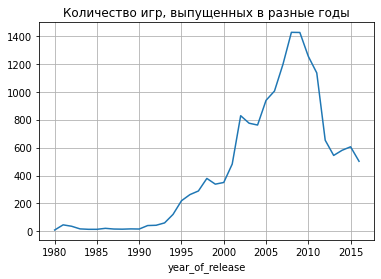

In [12]:
# Смотрим, сколько игр выпускалось по годам
df.groupby('year_of_release')['name'].count().plot(grid=True, title='Количество игр, выпущенных в разные годы');

По графику видим, что до 1994 года выпускалось очень мало игр. Из этого можем сделать вывод, что данные до 1994 года для нас не столь интересны.

In [13]:
df = df.query('year_of_release >= 1994') # Отбросим неинтересующие нас данные

### Изменение продаж по платформам

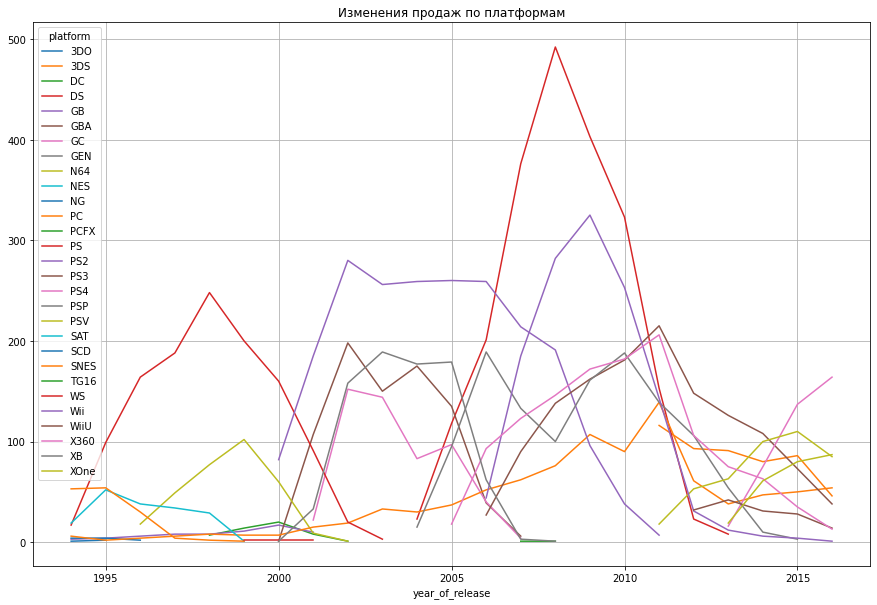

In [14]:
# Строим график продаж по платформам
df.groupby(['platform', 'year_of_release'])['total_sales'].count().unstack('platform').plot(grid=True, figsize=(15, 10), title='Изменения продаж по платформам');

Пока что не очень понятно, много пересекающихся линий одинаковых цветов. Но в целом наблюдается, что какие-то платформы пропадают, какие-то появляются, и примерное время жизни платформы около 10 лет. Попробуем ниже уточнить.

In [15]:
# Считаем суммарные продажи по платформам
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

Получаем, что по сумме продаж в ТОП-10 у нас: PS 2, Xbox 360, PS 3, Wii, DS, PS, PS 4, GBA, PSP, 3DS. Посмотрим, как они продавались по годам.

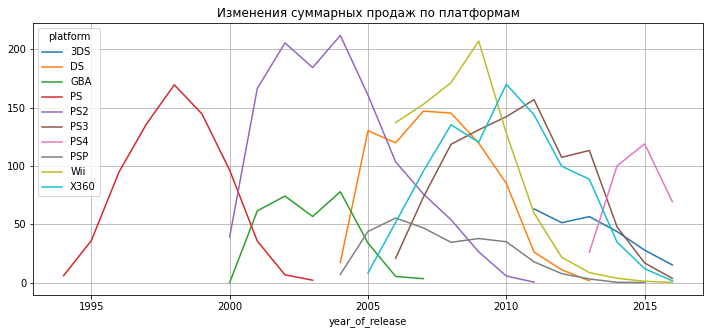

In [16]:
# Строим график по самым популярным платформам
platf_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
df[df['platform'].isin(platf_list)].groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(grid=True, figsize=(12, 5), title='Изменения суммарных продаж по платформам');

По графику видно, что платформы живут в основном от 9 до 11 лет. Бум продаж приходится на середину срока существования платформы.

Если средний срок жизини платформы 9-11 лет, значит для анализа нам подойдут платформы, которые были созданы менее 9-11 лет назад. К примеру, ясно, что нам нет смысла брать в актуальный период PS 3, так как она вышла в 2006 году, а значит к 2017 ее жизненный срок заканчивается.

### Выведем актуальные и потенциальные платформы

In [17]:
# Выводим даты выхода платформ
df.groupby('platform')['year_of_release'].min().sort_values()

platform
3DO     1994
GB      1994
SNES    1994
SCD     1994
GEN     1994
NES     1994
NG      1994
PC      1994
PS      1994
SAT     1994
TG16    1995
N64     1996
PCFX    1996
DC      1998
WS      1999
PS2     2000
XB      2000
GBA     2000
GC      2001
PSP     2004
DS      2004
X360    2005
Wii     2006
PS3     2006
PSV     2011
3DS     2011
WiiU    2012
PS4     2013
XOne    2013
Name: year_of_release, dtype: int64

Нам имеем смысл в анализ взять те платформы, которые вышли после 2006 года. То есть: PSV, 3DS, WiiU, PS4, XOne. Ниже создадим отфильтрованную таблицу по платформам. Это потенциально прибильные платформы. Также добавим РС, так как эта платформа обновляемая, значит всегда актуальная.

In [18]:
# Создадим таблицу по отфильтрованым платформам
platform_filtred = ['PSV', '3DS', 'WiiU', 'PS4', 'XOne', 'PC']
df_filtred = df[(df['platform'].isin(platform_filtred)) & (df['year_of_release'] >= 2011)].reset_index(drop=True)
df_filtred.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undef,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undef,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undef,11.68


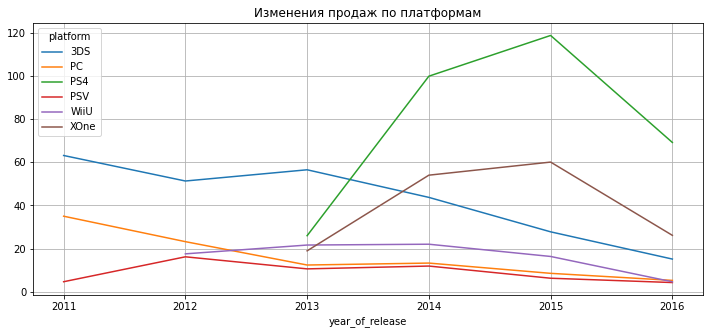

In [19]:
# Создадим график суммы продаж по годам
df_filtred.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(grid=True, figsize=(12, 5), title='Изменения продаж по платформам');

Все представленные на данном графике платформы можно считать потенциально прибыльными на 2017 год. Но особое внимание стоит уделить PS 4 и Xbox One, так как они являются самыми современными платформами. Продажи у платформ падают к 2016 году, может не вся статистика собрана или еще какие-то проблемы. Но продажи PS 4 и Xbox One больше, чем у других платформ.

### Диаграммы размаха

count    2116.000000
mean        0.456026
std         1.138648
min         0.010000
25%         0.040000
50%         0.110000
75%         0.362500
max        14.630000
Name: total_sales, dtype: float64


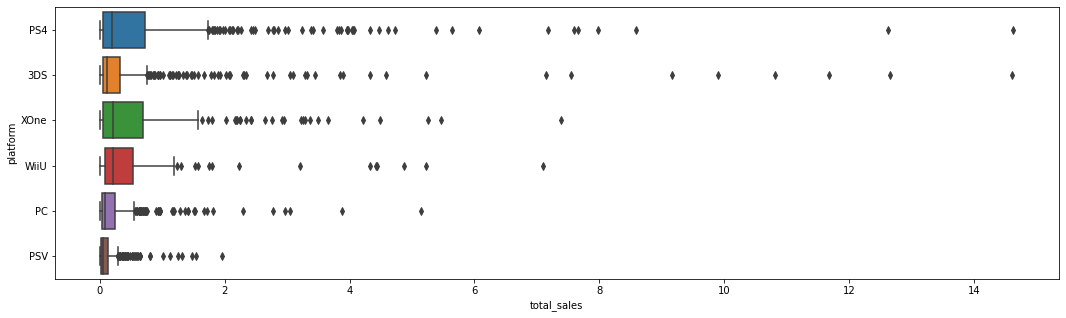

In [20]:
# Строим диаграмму размаха
print(df_filtred['total_sales'].describe())

plt.figure(figsize=(18, 5))
sns.boxplot(data=df_filtred, x='total_sales', y='platform');

На данной диаграмме размаха почти не видно основные показатели (квартили и тд), но хорошо видно выбросы, поэтому ниже сделаем такую же диаграмму, но с лимитами.

(0.0, 3.0)

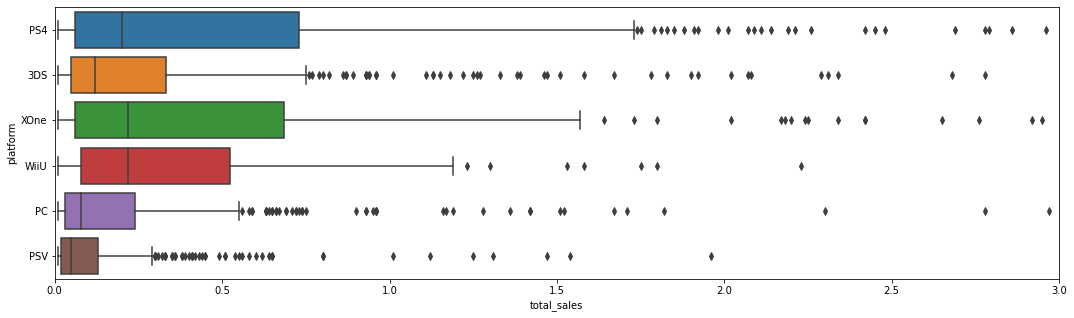

In [21]:
# Строим диаграмму размаха с ограничением по значениям х
plt.figure(figsize=(18, 5))
sns.boxplot(data=df_filtred, x='total_sales', y='platform');
plt.xlim(0, 3)

На данной диаграмме лучше видно квартили и медианы. Видим явных лидеров PS 4, Xbox One. У них все показатели продаж выше остальных. Явно отстает PSV. Продажи у нее совсем маленькие.

### Влияние критики и отзывов на продажи

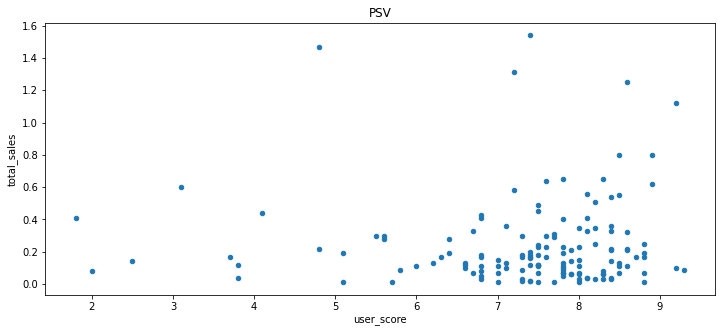

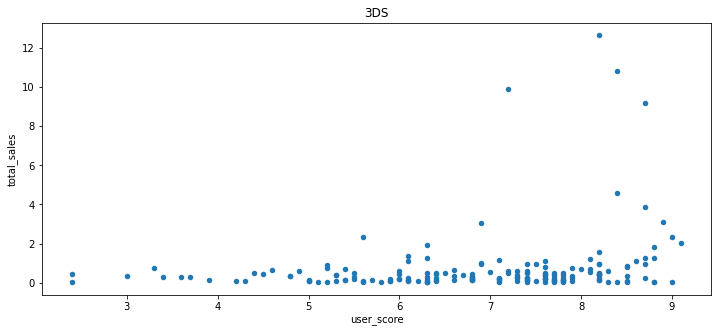

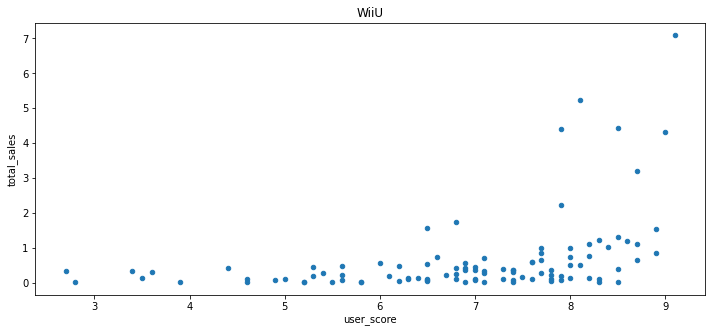

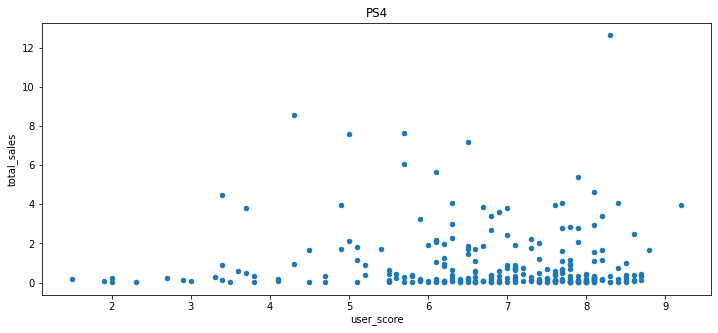

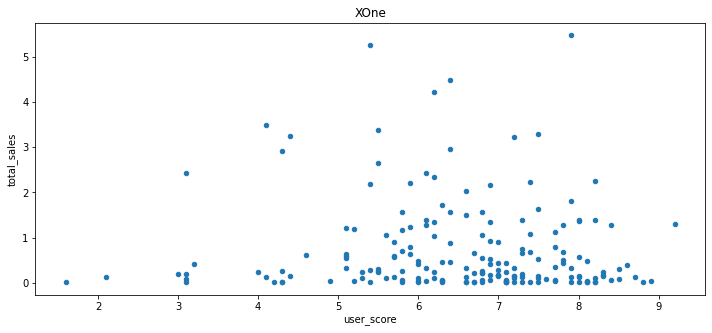

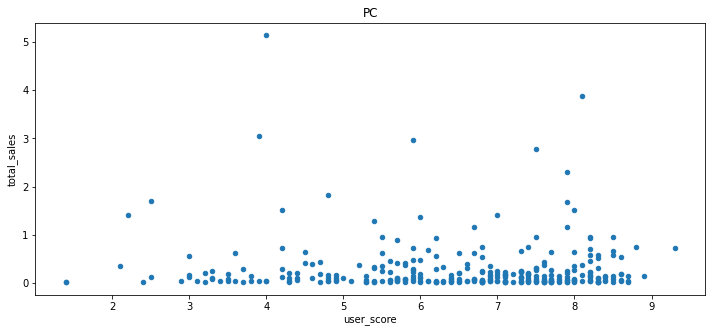

In [22]:
# Строим диаграммы рассеяния, которые показывают зависимость продаж игр на опред. платформу от оценки пользователей
for platform in platform_filtred:
    df_filtred.query('platform == @platform').plot(
        x='user_score', 
        y='total_sales', 
        kind='scatter', 
        title=platform, figsize=(12, 5))

Судя по диаграммам ни у одной из платформ нет зависимости продаж игр от оценки пользователей. Есть игры с низкими оценками, но хорошими продажами и наоборот.

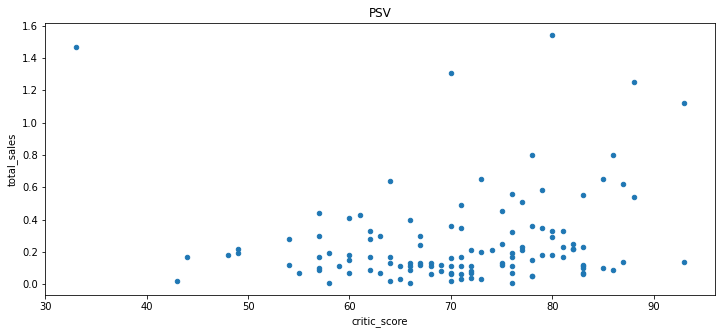

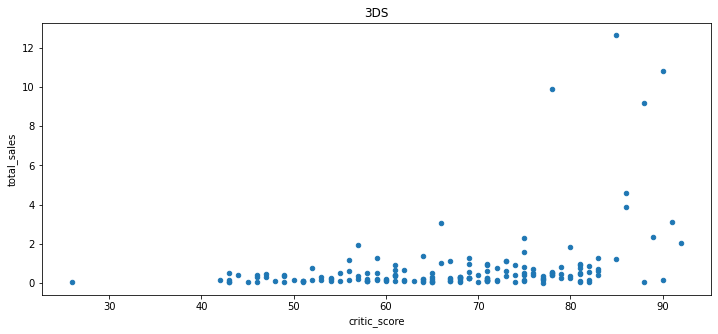

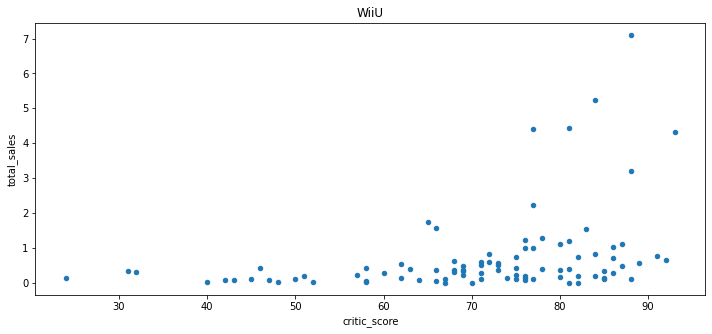

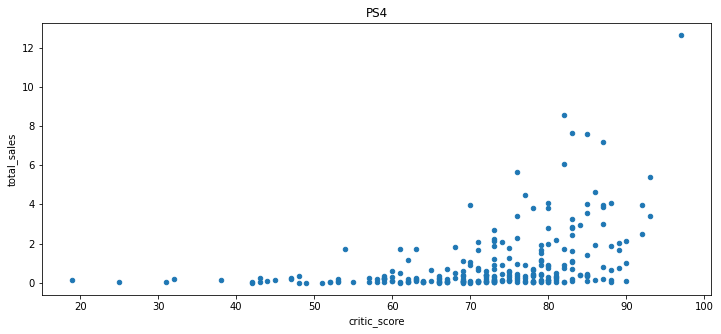

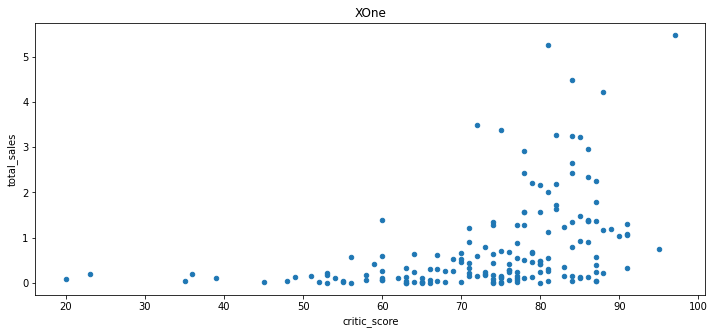

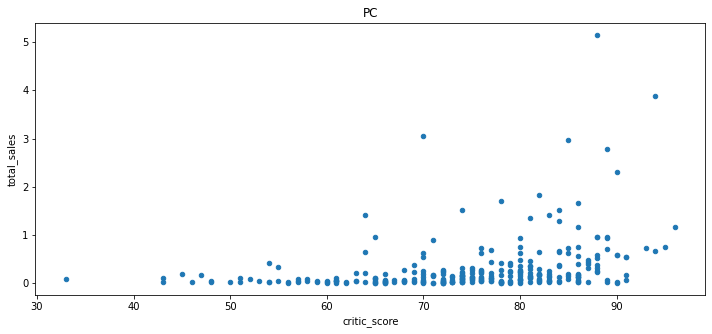

In [23]:
# Строим диаграммы рассеяния, которые показывают зависимость продаж игр на опред. платформу от оценки критиков
for platform in platform_filtred:
    df_filtred.query('platform == @platform').plot(
        x='critic_score', 
        y='total_sales', 
        kind='scatter', 
        title=platform, 
        figsize=(12, 5))

Судя по диаграммам ни у одной из платформ нет зависимости продаж игр от оценки критиков. Есть игры с низкими оценками, но хорошими продажами и наоборот. Хотя в целом, можно заметить, что оценки критиков немного больше влияют на предпочтения, но буквально на уровне погрешности.

In [24]:
# Выводим корреляцию продаж от оценок пользователей и критиков
# 1 - PSV
# 2 - 3DS
# 3 - WiiU
# 4 - PS4
# 5 - XOne
# 6 - PC
for platform in platform_filtred:
    display(df_filtred.query('platform == @platform')[['total_sales', 'critic_score', 'user_score']].corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.131763,0.013489
critic_score,0.131763,1.000000,0.734300
user_score,0.013489,0.734300,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.314185,-0.048967
critic_score,0.314185,1.000000,0.464815
user_score,-0.048967,0.464815,1.000000


Корреляция подтверждает наши предыдущие выводы. Зависимость крайне низкая. Мне кажется, в данном вопросе бОльшую роль играет маркетинг, ожидания и удачность серии.

### Распределение игр по жанрам

In [25]:
# создадим 2 сводные таблицы с кол-вом игр в опред. жанре и суммой продаж по жанрам, и объединим их
df1 = df_filtred.pivot_table(index='genre', values='name', aggfunc='count')

df2 = df_filtred.pivot_table(index='genre', values='total_sales', aggfunc='median')

df3 = df1.join(df2)
df3.sort_values(by='total_sales', ascending=False)

,name,total_sales
genre,,
Shooter,162,0.410
Platform,77,0.210
Sports,164,0.195
Role-Playing,284,0.155
Racing,92,0.130
Fighting,63,0.120
Action,717,0.110
Misc,146,0.110
Simulation,87,0.100


Для выявления самого прибыльного и провального жанра мы сделали сводную таблицу с количеством игр и медианными продажами в каждом жанре. Почему именно медиана? Она устойчива к слишком резким значениями и показывает более правдивые данные (то бишь одна очень хорошо продаваемая игра, может исказить статистику при расчете среднего).

Как мы видим самым массивным жанром является экшн, но медианные продажи у него достаточно низки, а вот у шутеров, коих в несколько раз меньше, медианные продажи намного лучше.

Можно выделить самые прибыльные жанры: шутеры, платформеры, спортивные игры.

На последнем месте у нас находятся игры в жанре приключения! Хоть их выпущено достаточно много, в рамках исследуемого периода, но медианные продажи очень низкие! За такие игры лучше не браться.

## Портрет пользователя каждого региона

### Портрет пользователя из Северной Америки

In [26]:
# Выводим информацию о самых популярных платформах в Северной Америке
na_table_plat = df_filtred.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_table_plat

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,82.65
WiiU,38.10
PC,29.88


По сводной таблице мы видим, что лидерами по продажам игр являются PS4, XOne, 3DS, WiiU, PC.

In [27]:
# Выводим информацию о самых популярных жанрах в америке
na_table_genr = df_filtred.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_table_genr

,na_sales
genre,
Action,93.41
Shooter,81.82
Role-Playing,52.00
Sports,40.04
Platform,26.97


Самыми любимы жанрами в Северной Америке являются экшн, шутеры, ролевые игры, спортивные игры и платформеры.

In [28]:
# Выводим информацию о продажах в зависимости от рейтинга ESRB
na_table_rate = df_filtred.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_table_rate

,na_sales
rating,
M,112.22
E,81.14
undef,78.86
T,47.85
E10+,44.89


Можно сделать логичные выводы по таблице. Она говорит нам о том, что игры, получившие рейтинг "М", "Е", "Т" и "undef" (игры без рейтинга тоже достаточно популярны) - самые продаваемые. Меньше ограничений - больше продаж + это основная аудитория (подростки и взрослые).

**Сделаем вывод, что ретинг влияет на продажи в Северной Америке, ведь чем меньше ограничений, тем больше продаж.**

**Портрет пользовтаеля из Северной америки!**

Скорее всего это будет подросток или взрослый человек, который любит экшны и стрелялки, и иногда, в выходные, поиграть с друзьями в ФИФУ или НХЛ на своей приставке. 

### Портрет пользователя из Европы

In [29]:
# Выводим информацию о самых популярных платформах в Европе
eu_table_plat = df_filtred.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_table_plat

,eu_sales
platform,
PS4,141.09
3DS,61.27
PC,56.70
XOne,51.59
WiiU,25.13


ТОП 5 платформ в европе - это PS 4, 3DS, PC, XOne, WiiU. В отличии от америки, европа больше играет в пк и не совсем любит WiiU.

In [30]:
# Выводим информацию о самых популярных жанрах в Европе
eu_table_genr = df_filtred.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_table_genr

,eu_sales
genre,
Action,90.21
Shooter,72.92
Sports,43.66
Role-Playing,42.91
Platform,22.30


Немного поменялось расположение, но в целом пятерка нам знакома. Европецы играют в ролевые игры меньше амеркианцев.

In [31]:
# Выводим информацию о продажах в зависимости от рейтинга ESRB
eu_table_rate = df_filtred.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_table_rate

,eu_sales
rating,
M,113.17
E,81.66
undef,75.65
T,44.61
E10+,33.73


Чаще всего в Европе продаются игры с рейтингом "М". Картина в целом похожа на американскую. Игры без рейтинга также занимают не последнее место и влияют на статистику.

**Портрет типичного игрока из Европы:**

Это подросток или взрослый человек, играющий в экшн игры на своей PS4.

### Портрет пользователя из Японии

In [32]:
# Выводим информацию о самых популярных платформах в Японии
jp_table_plat = df_filtred.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_table_plat

,jp_sales
platform,
3DS,100.62
PSV,21.84
PS4,15.96
WiiU,13.01
XOne,0.34


Япония - как отдельный мир! Здесь ситуация по платформам отличается от Евроопы и США. Япония играет в основном в свое, национальное! Nintendo и PS заняли почти весь ТОП.

In [33]:
# Выводим информацию о самых популярных жанрах в Японии
jp_table_genr = df_filtred.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_table_genr

,jp_sales
genre,
Role-Playing,54.19
Action,36.54
Platform,10.71
Misc,10.70
Simulation,10.64


Даже жанры в Японии предпочитают другие. Экшн и спорт - это, конечно, хорошо, но для японца радость поиграть в ролевую игру.

In [34]:
# Выводим информацию о продажах в зависимости от рейтинга ESRB
jp_table_rate = df_filtred.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_table_rate

,jp_sales
rating,
undef,87.91
E,29.76
T,16.50
M,9.28
E10+,8.32


В Японии игры без рейтинга ESRB по популярности занимают 1 место! В целом, мы выяснили, что Япония, как отдельный мир - олтичается от всех. Наверняка большая часть Японцев играет в "свои" ролевые игры.

**Портрет игрока из Японии:**

Это подросток или взрослый, который любит поиграть в ролевые игры на Nintendo или PS.

**Вывод:**

Как мы видим портреты игрока из СА и Европы схожи. Они играют почти в одни и те же игры, на одних и тех же платформах. Япония очень сильно отличается от остальных регионов, там и платформы другие и жанры тоже.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0: Средние пользовательские рейтинги Xbox One = средним пользовательским рейтингам PC 

Н1:Средние пользовательские рейтинги Xbox One != средним пользовательским рейтингам PC

**В данном случае мы будем проводить двухвыборочный ttest для двух генеральных совокупностей не зависящих друг от друга**

In [35]:
# Создаем таблицу из отфильтрованных данных для Иксбокса с пользовательскими рейтингами
xone_t = df_filtred.loc[(df_filtred['platform'] == 'XOne') & (df_filtred['user_score'] > 0)]['user_score']

In [36]:
# Создаем таблицу из отфильтрованных данных для ПК с пользовательскими рейтингами
pc_t = df_filtred.loc[(df_filtred['platform'] == 'PC') & (df_filtred['user_score'] > 0)]['user_score']

In [37]:
# Проверяем гипотезу
alpha = .05
results = st.ttest_ind(xone_t, pc_t)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Как мы видим нам не удалось отвергнуть нулевую гипотезу - это говорит о том, что средние пользовательские рейтинги Xbox One равны средним пользовательским рейтингам PC.

### Средние пользовательские рейтинги жанров Action и Sports разные

Н0: Средние пользовательские рейтинги жанра Action = средним пользовательским рейтингам жанра Sports 

Н1:Средние пользовательские рейтинги жанра Action != средним пользовательским рейтингам жанра Sports

**В данном случае мы будем проводить двухвыборочный ttest для двух генеральных совокупностей не зависящих друг от друга**

In [38]:
# Создаем таблицу из отфильтрованных данных для экшн игр с пользовательскими рейтингами
action_t = df_filtred.loc[(df_filtred['genre'] == 'Action') & (df_filtred['user_score'] > 0)]['user_score']

In [39]:
# Создаем таблицу из отфильтрованных данных для спортивных игр с пользовательскими рейтингами
sports_t = df_filtred.loc[(df_filtred['genre'] == 'Sports') & (df_filtred['user_score'] > 0)]['user_score']

In [40]:
# Проверяем гипотезу
alpha = 0.05
results = st.ttest_ind(action_t, sports_t)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.7279566072817166e-13
Отвергаем нулевую гипотезу


В данном случае нам удалось отвергнуть нулевую гипотезу, а это значит, что средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports.

## Общий вывод

**Мы провели исследование для интернет-магазина "Стримчик" для его рекламной кампании. Мы проверили данные и поработали с ними, а именно:**

1. *Провели предобработку данных*
    
    * Заменили названия столбцов на snake_case;
    * Преобразовали типы данных;
    * Избавились от пропусков там, где это было возможно сделать.
    

2. *Провели исследовательский анализ данных*

    * Проанализировали выпуск игр;
    * Провели фильтрацию платформ;
    * Определили актуальный период для исследования;
    * Выявили потенциально прибильные платформы;
    * Провели исследование влияния оценок пользователей и критиков на продажи игр;
    * Посмотрели на распределение игр по жанрам
    * Визуализировали данные и сделали выводы
    

3. *Составили портрет пользователя каждого региона*


4. *Проверили гипотезы*

    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные.
    
**Какие выводы можем сделать:**

1. Проанализировав выпуск игры, мы определили, что данные до 1994 года нас не интересуют, так как за этот период очень мало данных;


2. Определили, что платформы в среднем живут от 9 до 11 лет;


3. Поняли, что для исследования нам стоит ограничиться определенными платформами, а именно: PS4, PSV, 3DS, XOne, PC, WiiU. Потому что эти платформы актуальны;


4. Выявили, что вышеописанные платформы достаточно перспективны на ближайшее время и могут принести прибыль. Но стоит обратить внимание именно на PS4 и XOne - они показали лучшие результаты. Скорее всего именно они и будут самыми прибыльными платформами в 2017 году;


5. Выявили, что оценки критиков и пользователей практически не влияют на успешность игры, их корреляция крайне низкая;


6. Составили сводные таблицы и выяснили, что экшн игры - самые популярные и прибыльные, а вот пазлы мало кто любит (мало продаж);


7. Выяснили, что пользователи Европы и Северной Америки очень похожи: они играют почти в одни и те же приставки и жанры. А вот Япония сильно отличается от них.


8. Проверили 2 гипотезы и выявили, что:

    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные.